In [1]:
import pandas as pd

In [3]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C:/Users/Hari balaji M/Downloads/employee_dataset_12000_rows.csv")
df.head()

,emp_id,emp_name,gender,age,dept_id,dept_name,salary,bonus,hire_date,experience_years,performance_rating,is_promoted
0,1,Nisha Iyer,Male,38,102,HR,39144,2507.34,2014-10-16,13,1,0
1,2,Kavya Mehta,Male,55,104,Sales,76463,5606.41,2020-05-09,27,3,1
2,3,Sneha Verma,Female,27,103,Finance,139131,18477.44,2015-11-21,1,4,1
3,4,Simran Singh,Male,23,106,Operations,58238,4332.80,2022-04-21,2,4,1
4,5,Vivek Joshi,Male,59,106,Operations,105589,16122.61,2019-01-18,17,5,0


In [7]:
df.shape


(12000, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emp_id              12000 non-null  int64  
 1   emp_name            12000 non-null  object 
 2   gender              12000 non-null  object 
 3   age                 12000 non-null  int64  
 4   dept_id             12000 non-null  int64  
 5   dept_name           12000 non-null  object 
 6   salary              12000 non-null  int64  
 7   bonus               12000 non-null  float64
 8   hire_date           12000 non-null  object 
 9   experience_years    12000 non-null  int64  
 10  performance_rating  12000 non-null  int64  
 11  is_promoted         12000 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.1+ MB


In [33]:
df['hire_date'] = pd.to_datetime(df['hire_date'])


In [35]:
df['hire_year'] = df['hire_date'].dt.year


In [11]:
df["dept_name"].unique()

array(['HR', 'Sales', 'Finance', 'Operations', 'Marketing', 'IT', 'Admin'],
      dtype=object)

In [13]:
df.isnull().sum()

emp_id                0
emp_name              0
gender                0
age                   0
dept_id               0
dept_name             0
salary                0
bonus                 0
hire_date             0
experience_years      0
performance_rating    0
is_promoted           0
dtype: int64

In [15]:
num_cols= df.select_dtypes(include='number').columns
num_cols


Index(['emp_id', 'age', 'dept_id', 'salary', 'bonus', 'experience_years',
       'performance_rating', 'is_promoted'],
      dtype='object')

Text(0.5, 1.0, 'Outlier Detection Using Boxplots')

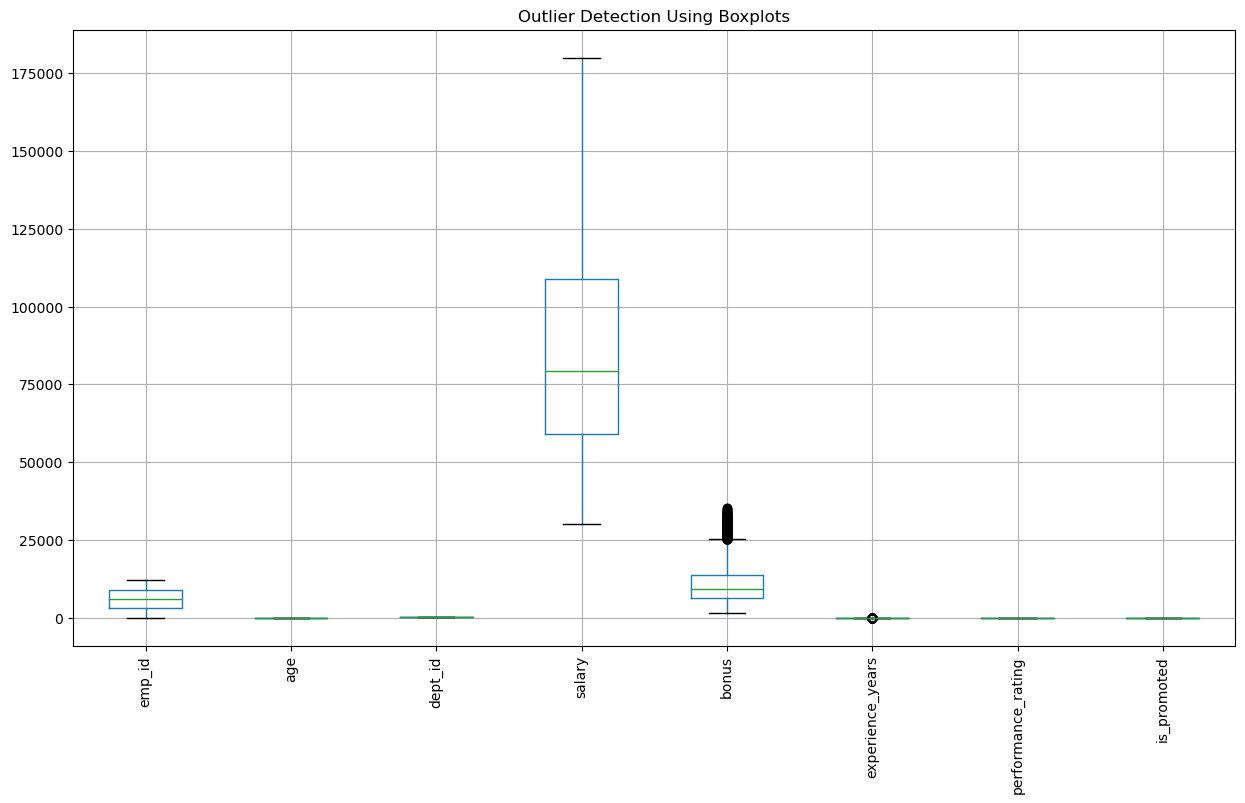

In [17]:
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Outlier Detection Using Boxplots")


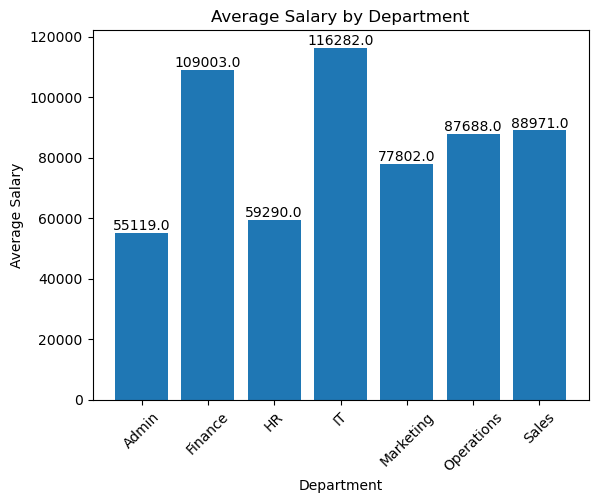

In [23]:
dept_avg_salary = df.groupby('dept_name')['salary'].mean()

plt.figure()
bars = plt.bar(dept_avg_salary.index, dept_avg_salary.values)

plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             round(height, 0), 
             ha='center', va='bottom')

plt.show()



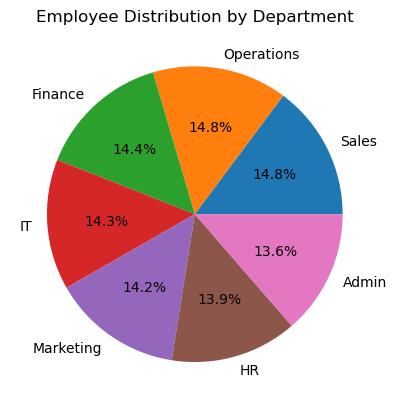

In [25]:
dept_count = df['dept_name'].value_counts()

plt.figure()
plt.pie(dept_count.values, labels=dept_count.index, autopct='%1.1f%%')

plt.title("Employee Distribution by Department")
plt.show()


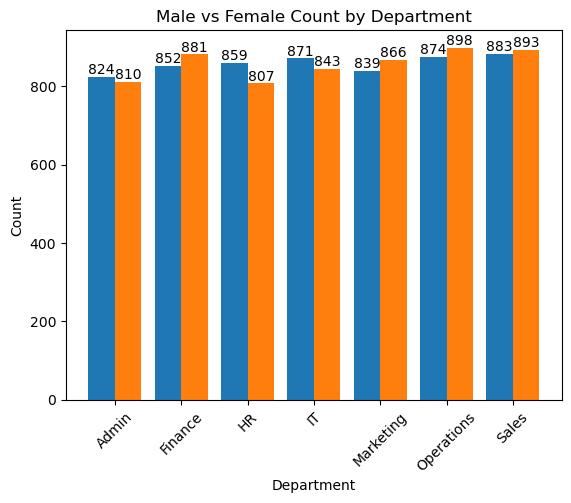

In [27]:
gender_dept = df.groupby(['dept_name', 'gender']).size().unstack()

x = range(len(gender_dept.index))
width = 0.4

plt.figure()
bars1 = plt.bar(x, gender_dept['Male'], width=width)
bars2 = plt.bar([i + width for i in x], gender_dept['Female'], width=width)

plt.xticks([i + width/2 for i in x], gender_dept.index, rotation=45)
plt.title("Male vs Female Count by Department")
plt.xlabel("Department")
plt.ylabel("Count")

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             int(height), ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             int(height), ha='center', va='bottom')

plt.show()


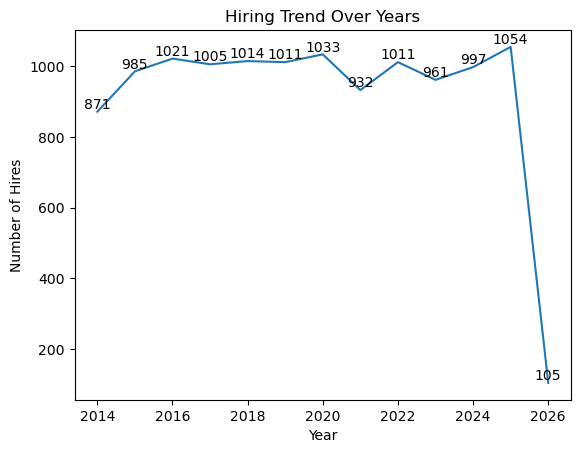

In [39]:
hiring_trend = df['hire_year'].value_counts().sort_index()

plt.figure()
plt.plot(hiring_trend.index, hiring_trend.values)

plt.title("Hiring Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Hires")

for x, y in zip(hiring_trend.index, hiring_trend.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

plt.show()



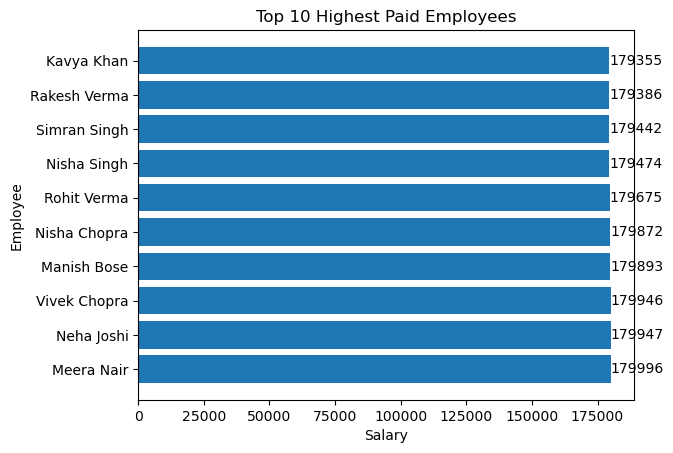

In [67]:
top10 = df.sort_values('salary', ascending=False).head(10)

plt.figure()
bars = plt.barh(top10['emp_name'], top10['salary'])

plt.title("Top 10 Highest Paid Employees")
plt.xlabel("Salary")
plt.ylabel("Employee")

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             round(width, 0),
             va='center')

plt.show()


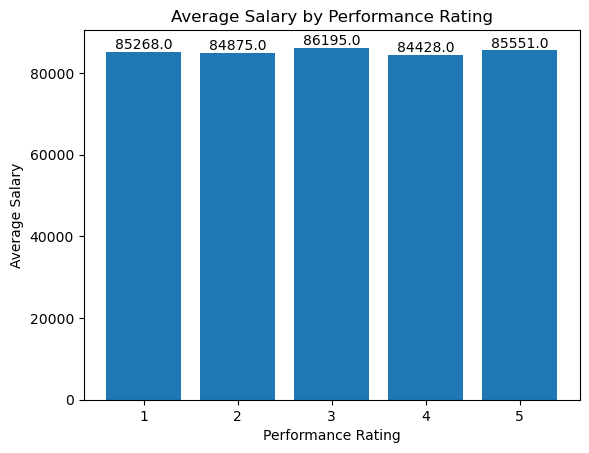

In [61]:

avg_salary_perf = df.groupby('performance_rating')['salary'].mean()

plt.figure()
bars = plt.bar(avg_salary_perf.index.astype(str), avg_salary_perf.values)

plt.title("Average Salary by Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Average Salary")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             round(height,0),
             ha='center', va='bottom')

plt.show()


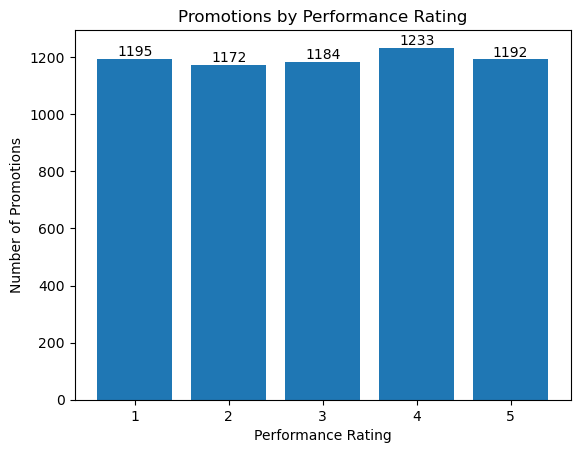

In [63]:
promotion_perf = df.groupby('performance_rating')['is_promoted'].sum()

plt.figure()
bars = plt.bar(promotion_perf.index.astype(str), promotion_perf.values)

plt.title("Promotions by Performance Rating")
plt.xlabel("Performance Rating")
plt.ylabel("Number of Promotions")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             int(height),
             ha='center', va='bottom')

plt.show()


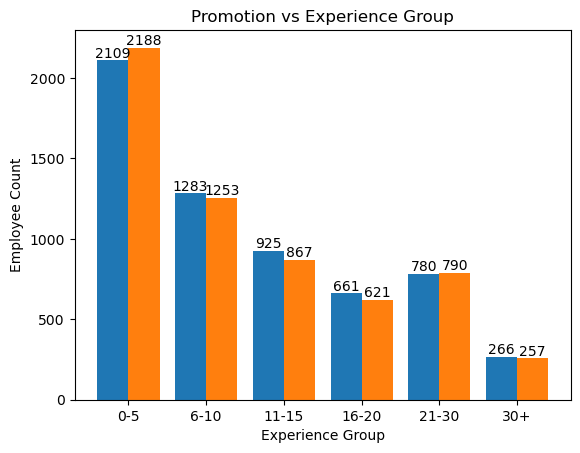

In [81]:

bins = [0, 5, 10, 15, 20, 30, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '30+']

df['experience_group'] = pd.cut(
    df['experience_years'],
    bins=bins,
    labels=labels,
    right=False
)

promotion_counts = df.groupby(
    ['experience_group', 'is_promoted'],
    observed=True
).size().unstack(fill_value=0)

x = range(len(promotion_counts.index))
width = 0.4

plt.figure()

bars1 = plt.bar(x, promotion_counts[0], width)
bars2 = plt.bar([i + width for i in x], promotion_counts[1], width)

plt.xticks([i + width/2 for i in x],
           promotion_counts.index.astype(str))

plt.title("Promotion vs Experience Group")
plt.xlabel("Experience Group")
plt.ylabel("Employee Count")

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center',
             va='bottom')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             int(bar.get_height()),
             ha='center',
             va='bottom')

plt.show()




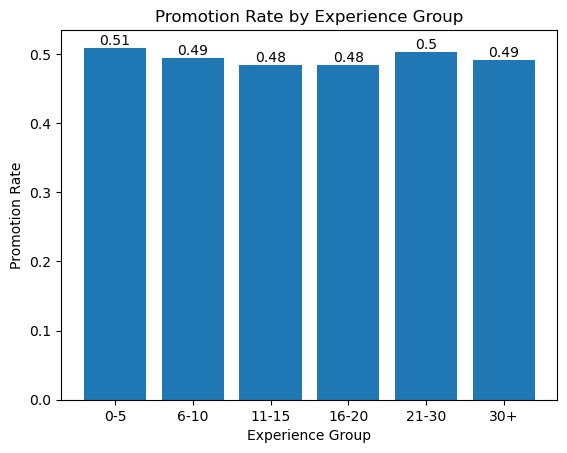

In [71]:
bins = [0, 5, 10, 15, 20, 30, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '30+']

df['experience_group'] = pd.cut(df['experience_years'], bins=bins, labels=labels, right=False)

promotion_rate = df.groupby('experience_group', observed=True)['is_promoted'].mean()

plt.figure()
bars = plt.bar(promotion_rate.index.astype(str), promotion_rate.values)

plt.title("Promotion Rate by Experience Group")
plt.xlabel("Experience Group")
plt.ylabel("Promotion Rate")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             round(height,2),
             ha='center', va='bottom')

plt.show()
